In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados

In [2]:
fator_contribuinte=pd.read_csv('Dados/fator_contribuinte_2010_2020.csv', sep = ';', low_memory=False)
fator_contribuinte

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
...,...,...,...,...,...
4156,79397,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4157,79397,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4158,79397,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4159,79665,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL


### Verificando os tipos das colunas e se existem dados faltantes

In [4]:
fator_contribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   4161 non-null   int64 
 1   fator_nome           4161 non-null   object
 2   fator_aspecto        4161 non-null   object
 3   fator_condicionante  4161 non-null   object
 4   fator_area           4161 non-null   object
dtypes: int64(1), object(4)
memory usage: 162.7+ KB


### Verificando se existem dados duplicados

In [5]:
print("Duplicated values: ", fator_contribuinte.duplicated().sum())

Duplicated values:  0


# Carregando os dados das ocorrências que foram filtradas no notebook Ocorrencias.ipynb

In [6]:
ocorrencias=pd.read_csv('Dados/Ocorrencias_Filtradas.csv', sep = ',', low_memory=False)
ocorrencias

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


### Renomeando a primeira coluna para dar o merge com o outro arquivo

In [7]:
ocorrencias_new = ocorrencias.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia3'})
ocorrencias_new

,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


# Juntando os 2 dados, de ocorrências e dos fatores contribuintes

In [9]:
merge_fator_contribuinte = pd.merge(ocorrencias_new, fator_contribuinte, on=['codigo_ocorrencia3'])
merge_fator_contribuinte

,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,09/01/2010,9,1,2010,INDISCIPLINA DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,79195,ACIDENTE,PORTO VELHO,RO,****,20/02/2020,20,2,2020,OUTRO FATOR,OUTRO,***,OUTRO
4157,79397,ACIDENTE,CORRENTINA,BA,****,12/06/2020,12,6,2020,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4158,79397,ACIDENTE,CORRENTINA,BA,****,12/06/2020,12,6,2020,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4159,79397,ACIDENTE,CORRENTINA,BA,****,12/06/2020,12,6,2020,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO


### Checando as áreas de investigação

In [79]:
merge_fator_contribuinte.fator_area.value_counts()

FATOR OPERACIONAL    2720
FATOR HUMANO         1325
OUTRO                  62
***                    28
FATOR MATERIAL         26
Name: fator_area, dtype: int64

In [68]:
fator_contribuinte_plot = merge_fator_contribuinte.groupby(['fator_area', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='fator_area', values=0)
fator_contribuinte_plot

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
fator_area,,,
***,21.0,1.0,6.0
FATOR HUMANO,1139.0,10.0,176.0
FATOR MATERIAL,15.0,3.0,8.0
FATOR OPERACIONAL,2117.0,31.0,572.0
OUTRO,47.0,NaN,15.0


### Substituindo NaN por 0

In [77]:
fator_contribuinte_plot = fator_contribuinte_plot.fillna(0)
fator_contribuinte_plot

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
fator_area,,,
***,21.0,1.0,6.0
FATOR HUMANO,1139.0,10.0,176.0
FATOR MATERIAL,15.0,3.0,8.0
FATOR OPERACIONAL,2117.0,31.0,572.0
OUTRO,47.0,0.0,15.0


# Panorama das ocorrências por Área de Investigação

<Figure size 1080x576 with 0 Axes>

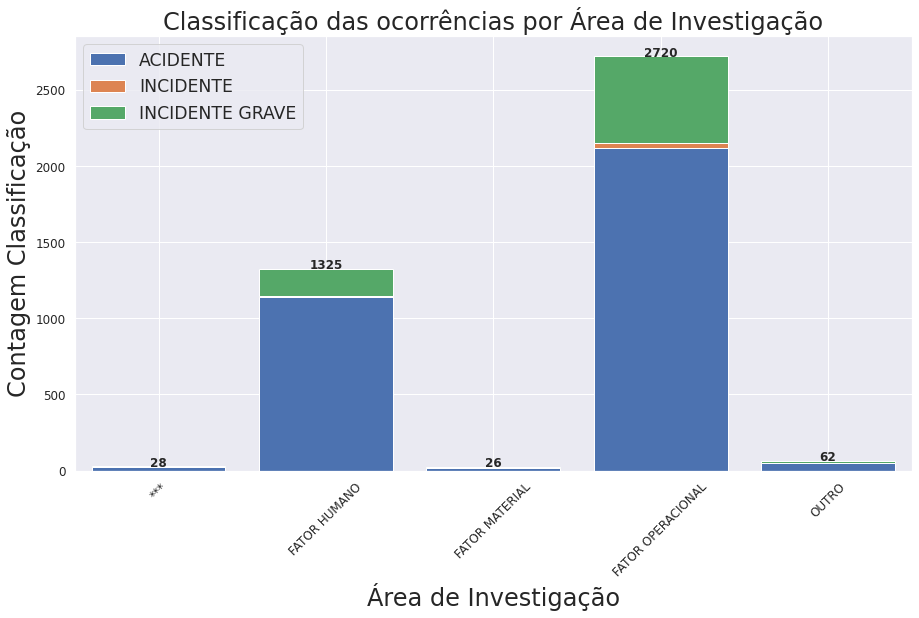

In [115]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = fator_contribuinte_plot.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Área de Investigação")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Área de Investigação")
plt.xticks(rotation=45)

bottom = np.zeros(len(fator_contribuinte_plot))

for i, col in enumerate(fator_contribuinte_plot.columns):
    ax.bar(fator_contribuinte_plot.index, fator_contribuinte_plot[col], bottom=bottom, label=col)
    bottom += np.array(fator_contribuinte_plot[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = fator_contribuinte_plot.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

### Como *, fator material e outro tem baixa quanidade de ocorrências em relação à fator humano e fator operacional, juntei as 3 áreas minoritária de investigação em outro, de modo a investigar as 2 áreas de investigação majoritárias

In [110]:
labels = merge_fator_contribuinte.fator_area.value_counts().index.tolist()
labels

['FATOR OPERACIONAL', 'FATOR HUMANO', 'OUTRO', '***', 'FATOR MATERIAL']

In [111]:
values = merge_fator_contribuinte.fator_area.value_counts().values
values

array([2720, 1325,   62,   28,   26])

In [112]:
new_labels = [labels[0], labels[1], 'OUTRO']
new_labels

['FATOR OPERACIONAL', 'FATOR HUMANO', 'OUTRO']

In [113]:
new_values = [values[0], values[1], sum(values[-3:])]
new_values

[2720, 1325, 116]

# Panorama das ocorrências por Área de Investigação

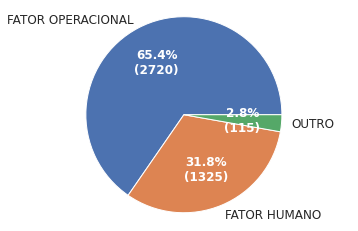

In [130]:
fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


_, _, autopcts = ax1.pie(new_values, labels=new_labels, autopct=lambda pct: func(pct, new_values))


plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12})


ax1.axis('equal')

plt.show()

# Selecionando os top 10 fatores contribuintes das ocorrências

In [35]:
top_10_fatores = merge_fator_contribuinte.query('fator_nome in @filter_fatores.index.tolist()')
top_10_fatores

,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,09/01/2010,9,1,2010,INDISCIPLINA DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,79198,ACIDENTE,PATROCÍNIO,MG,****,19/02/2020,19,2,2020,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4155,79198,ACIDENTE,PATROCÍNIO,MG,****,19/02/2020,19,2,2020,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4158,79397,ACIDENTE,CORRENTINA,BA,****,12/06/2020,12,6,2020,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4159,79397,ACIDENTE,CORRENTINA,BA,****,12/06/2020,12,6,2020,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO


# Panorama das ocorrências por Fatores Contribuintes

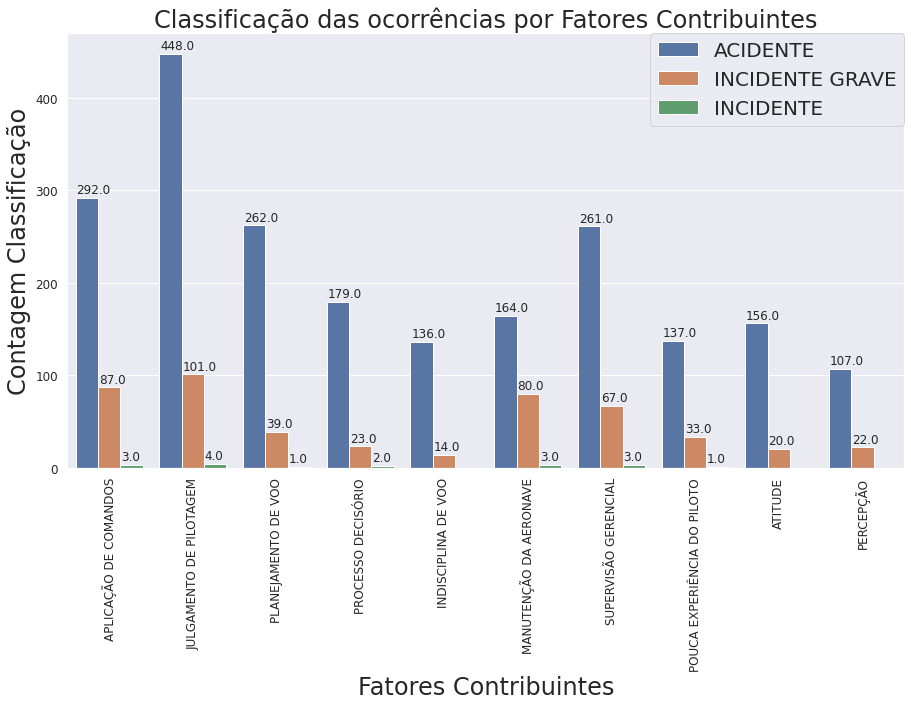

In [34]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x= top_10_fatores.fator_nome ,data=merge_fator_contribuinte, hue=merge_fator_contribuinte.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Fatores Contribuintes")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Fatores Contribuintes")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., prop={'size': 20})


for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))
